In [118]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import math
# math library gives us access to certain functions within python

In [88]:
#Here we have the titanic dataset with all the survivors data. We have to develop a model which classifies whether a user
# Has survived or not survived the sinking of the Titanic based on other factors given as data.
#Data dictionary
#Pclass - class eg. 3rd class, 2nd class, 1st class, etc...
#Sibsp - number of siblings/spouses aboard
#Parch - number of parents/children aboard
#Embarked - port of embarkation
df = pd.read_csv('Titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
df.shape

(891, 12)

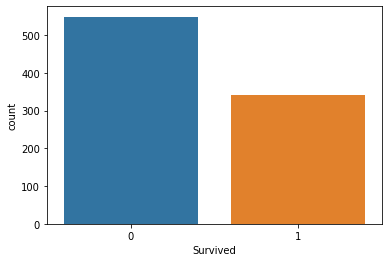

In [90]:
#Performing Exploratory Data Analysis on the Data-set
#tracking the count of the number of people who survived the sinking Titanic
sns.countplot('Survived',data=df)

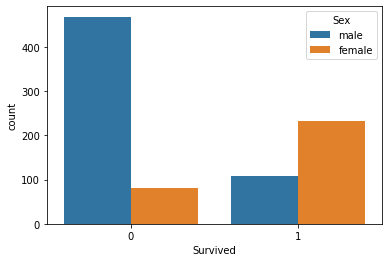

In [91]:
#splitting the above chart by sex
sns.countplot('Survived',hue='Sex',data=df)

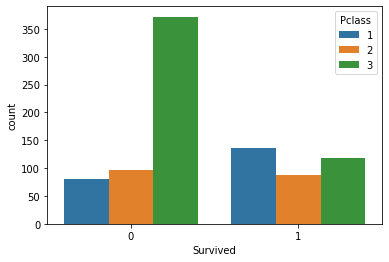

In [92]:
#Splitting the data based on the class
sns.countplot('Survived',hue='Pclass',data=df)

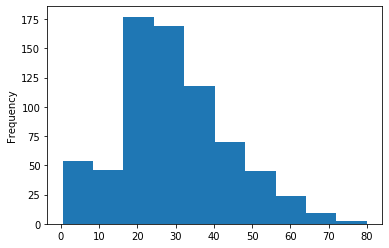

In [93]:
#Analyzing the ages of the passengers 
df['Age'].plot(kind='hist')

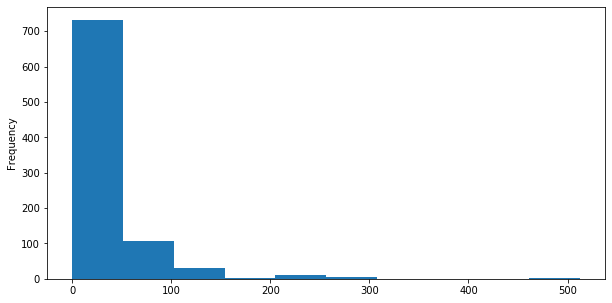

In [94]:
df['Fare'].plot(kind='hist',figsize=(10,5))

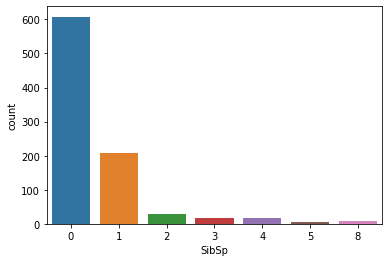

In [95]:
#Analyzing whether majority of the passengers had siblings/spouses
sns.countplot('SibSp',data=df)

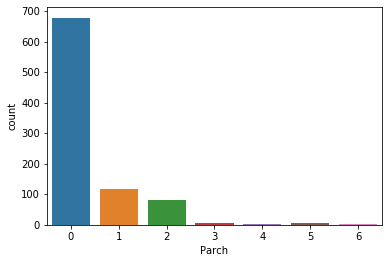

In [96]:
#Analyzing the count of the number of passengers who had parents/children
sns.countplot('Parch',data=df)

In [97]:
#finding out which fields have null values
df.isnull().sum()
#this shows that 177 rows of Age have null values, 687 rows of Cabin have NULL values and 2 rows of Embarked have Null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

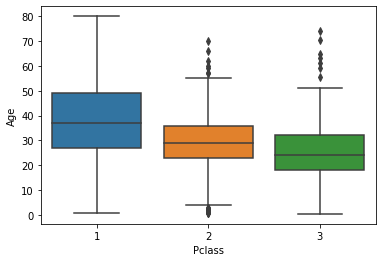

In [98]:
#Analyzing the distribution of the passengers belonging to different classes as per their ages
sns.boxplot(x='Pclass',y='Age',data=df)

In [99]:
#Next step is to replace all the missing values with some other values
#dropping cabin as it is a categorical variable and it would not affect the model much
df.drop('Cabin',axis=1,inplace=True)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [100]:
#Calculating the mode value for the Embarked field/column
df.Embarked.mode()

0    S
dtype: object

In [101]:
#Calculating the mean fare under each port of embarkation
df.groupby(['Embarked']).Fare.mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

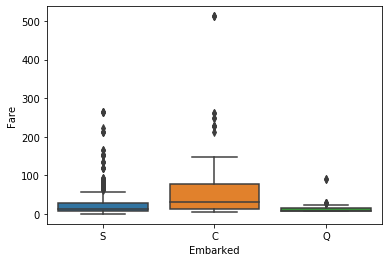

In [102]:
#Plotting a box plot for each embarkation for each port vs Fare
sns.boxplot(x='Embarked',y='Fare', data=df)

In [103]:
# Here we see that there are 2 passengers whose port of embarkation in NULL but the fare is 80 and when we plot the boxplot
# we seee that more people in C's fare is in between 20 to 100, so that's why we are filling NULL values with S.
# where as in S, prices with 80 are not within the first and third quartiles.
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


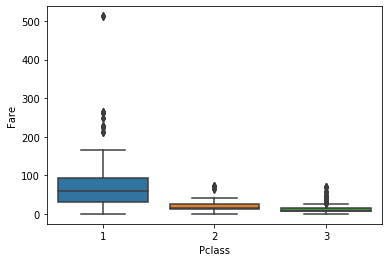

In [104]:
sns.boxplot(x='Pclass',y='Fare',data=df)

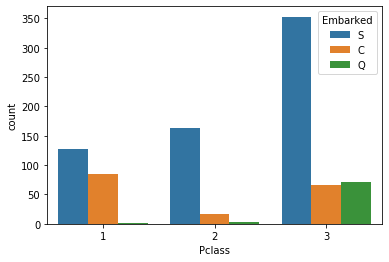

In [105]:
sns.countplot('Pclass',hue='Embarked',data=df)

In [106]:
#Imputing all the NA values with other values
df.Embarked.fillna('S',inplace=True)

In [107]:
# trying to impute the missing values of age by substituting the median value in these places.
# so we are extracting the salutation from the name and then we are substituting the median age for each 
# salutation.
def getTitle(name): 
    title_group = {
        'mr' : 'Mr',
        'mrs' : 'Mrs',
        'miss' : 'Miss',
        'master' : 'Master',
        'don' : 'Sir',
        'rev' : 'Sir',
        'dr' : 'Office',
        'mme' : 'Mrs', 
        'ms' : 'Mrs',
        'major' : 'Officer',
        'lady' : 'Lady', 
        'sir' : 'Sir',
        'mlle' : 'Miss', 
        'col' : 'Officer', 
        'capt': 'Officer', 
        'the countess' : 'Lady',
        'jonkheer' : 'Sir', 
        'dona' : 'Lady'
    }
    first_name = name.split(',')[1]
    title = first_name.split('.')[0]
    title = title.strip().lower()
    return title_group[title]
df = df.assign(Title = lambda x: x.Name.map(getTitle))
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [108]:
df.groupby('Title').Age.median()

Title
Lady       40.5
Master      3.5
Miss       21.0
Mr         30.0
Mrs        35.0
Office     46.5
Officer    56.0
Sir        42.0
Name: Age, dtype: float64

In [109]:
title_age_median = df.groupby(['Title']).Age.transform('median')
title_age_median.head(6)

0    30.0
1    35.0
2    21.0
3    35.0
4    30.0
5    30.0
Name: Age, dtype: float64

In [110]:
df.Age.fillna(title_age_median, inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [111]:
#Converting the categorical variables into dummies
Sex_d = pd.get_dummies(df.Sex,drop_first=True)
Embarked_d = pd.get_dummies(df.Embarked,drop_first=True)
Pclass_d = pd.get_dummies(df.Pclass,drop_first=True)
Pclass_d.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [112]:
#Concatinating the new columns with the old dataframe
df = pd.concat([df,Sex_d,Embarked_d,Pclass_d],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1,0,1,0,1


In [114]:
df.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked','Title'],axis=1,inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


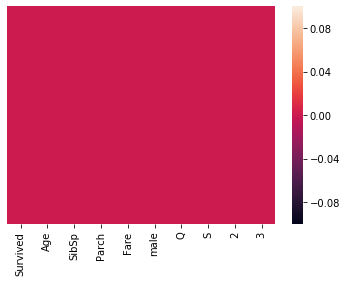

In [115]:
sns.heatmap(df.isnull(),yticklabels=False)

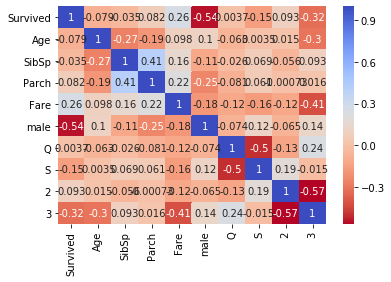

In [132]:
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm_r',annot=True)

In [133]:
#Creating the Logistic Regression Model
X = df.drop('Survived',axis=1)
Y = df.Survived

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_Test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [136]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\my\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
pred = model.predict(X_test)

In [141]:
from sklearn.metrics import classification_report
classification_report(pred,Y_Test)

'              precision    recall  f1-score   support\n\n           0       0.87      0.80      0.83       114\n           1       0.69      0.78      0.73        65\n\n    accuracy                           0.79       179\n   macro avg       0.78      0.79      0.78       179\nweighted avg       0.80      0.79      0.80       179\n'

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_Test,pred)

array([[91, 14],
       [23, 51]], dtype=int64)

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

In [151]:
print('Accuracy score ', accuracy_score(Y_Test, pred))
print('Precision score ', precision_score(Y_Test, pred))
print('Recall score ', recall_score(Y_Test, pred))
print('F1 score ', f1_score(Y_Test, pred))

Accuracy score  0.7932960893854749
Precision score  0.7846153846153846
Recall score  0.6891891891891891
F1 score  0.7338129496402878
